# 1. 사진 1로 해 보기 (차근차근)

In [32]:
# 필요 모듈 설치

import os
import urllib 
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation  
from matplotlib import pyplot as plt
from PIL import Image

(128, 128, 3)


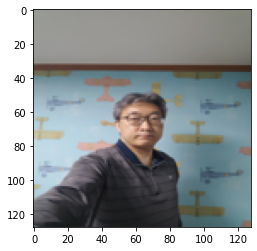

In [33]:
# 작업할 이미지 불러 오기 + 사이즈 줄이기

img = Image.open('../aiffel/human_segmentation/images/my_photo1.png')

img_resize = img.resize((128, 128))
img_resize.save('../aiffel/human_segmentation/images/my_photo1_resized.png')

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_photo1_resized.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file)

#  다운로드한 모델을 이용해 PixelLib로 사용할 세그멘테이션 모델을 생성

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 모델에 이미지 입력

segvalues, output = model.segmentAsPascalvoc(img_path)

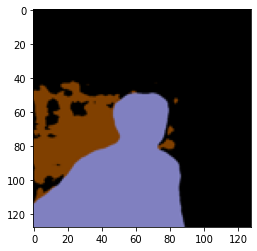

{'class_ids': array([ 0, 15, 20]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [35]:
# 모델에서 나온 출력값 보기
plt.imshow(output)
plt.show()

segvalues

In [36]:
# output 이미지가 BGR 순서로 채널 배치가 되어 있어서 RGB 순서로 된 colormap 순서를 바꿔 줌  

seg_color = (128,128,192)

(128, 128)


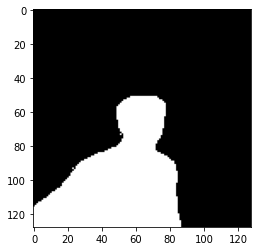

In [37]:
# seg_color로만 이루어진 마스크 만들기

seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

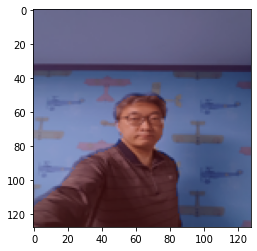

In [38]:
# 원래 이미지와 켭쳐 보기 

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔 주기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐 보기
img_show = cv2.addWeighted(img_show, 0.7, color_mask, 0.3, 0.0) # 7:3으로 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

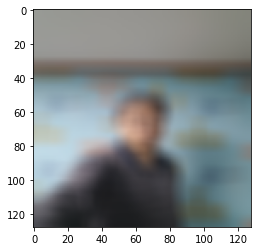

In [39]:
# 배경을 흐리게 하기 

img_orig_blur = cv2.blur(img_orig, (10,10))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

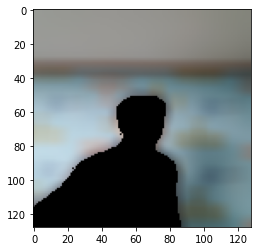

In [40]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

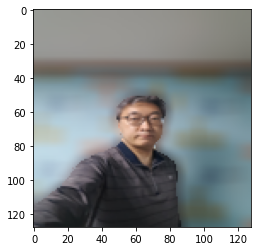

In [41]:
# 흐리게 한 배경과 원본 영상 합성하기

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 2. 멀리 배경 있는 사진으로 해 보기

(810, 1440, 3)


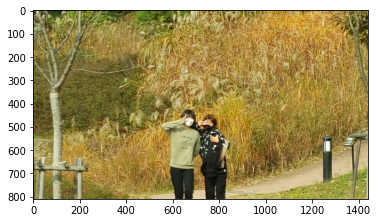

In [42]:
# 작업할 이미지 불러 오기 + 사이즈 줄이기

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/yumi_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file)

#  다운로드한 모델을 이용해 PixelLib로 사용할 세그멘테이션 모델을 생성

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 모델에 이미지 입력

segvalues, output = model.segmentAsPascalvoc(img_path)

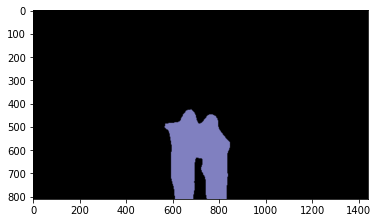

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [44]:
# 모델에서 나온 출력값 보기
plt.imshow(output)
plt.show()

segvalues

(810, 1440)


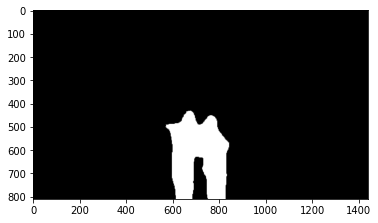

In [45]:
# output 이미지가 BGR 순서로 채널 배치가 되어 있어서 RGB 순서로 된 colormap 순서를 바꿔 줌  

seg_color = (128,128,192)

# seg_color로만 이루어진 마스크 만들기

seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

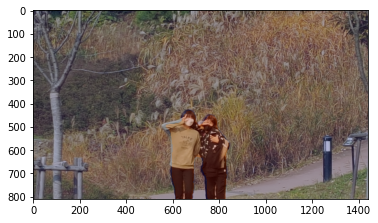

In [46]:
# 원래 이미지와 켭쳐 보기 

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔 주기
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐 보기
img_show = cv2.addWeighted(img_show, 0.7, color_mask, 0.3, 0.0) # 7:3으로 

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

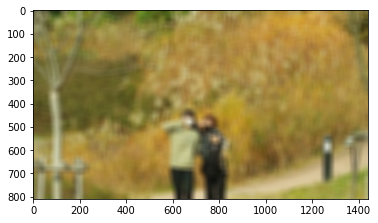

In [49]:
# 배경을 흐리게 하기 

img_orig_blur = cv2.blur(img_orig, (30,30))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

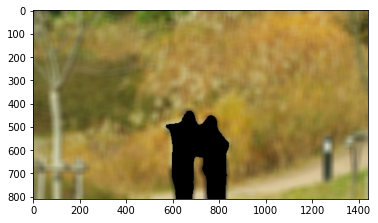

In [50]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

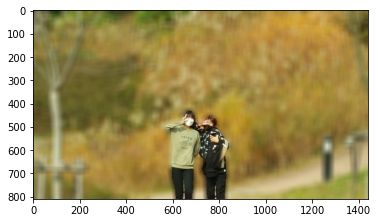

In [51]:
# 흐리게 한 배경과 원본 영상 합성하기

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 3. 고양이 사진으로 해 보기

(810, 1440, 3)


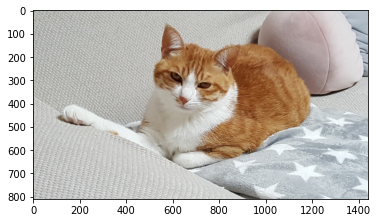

In [53]:
# 작업할 이미지 불러 오기 + 사이즈 줄이기

img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_cat1.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

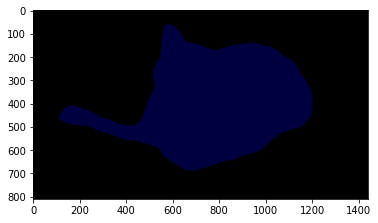

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [55]:
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file)

#  다운로드한 모델을 이용해 PixelLib로 사용할 세그멘테이션 모델을 생성

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 모델에 이미지 입력

segvalues, output = model.segmentAsPascalvoc(img_path)

# 모델에서 나온 출력값 보기
plt.imshow(output)
plt.show()

segvalues

In [56]:
colormap[8]

array([64,  0,  0])

(810, 1440)


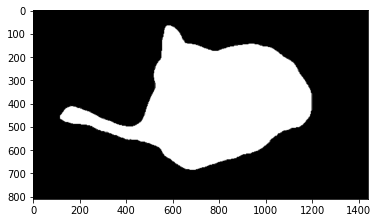

In [57]:
seg_color = (0,0,64)

seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()


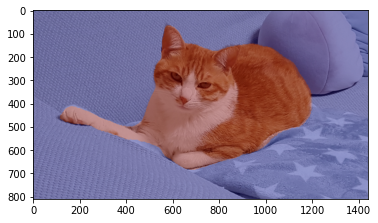

In [58]:
# 원래 이미지와 겹쳐 보면 세그멘테이션이 얼마나 잘 되었는지 알아보기 쉬울 것 같네요.

img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

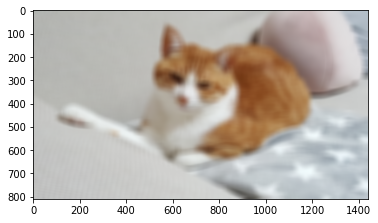

In [59]:
# 배경을 흐리게 하기 

img_orig_blur = cv2.blur(img_orig, (30,30))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

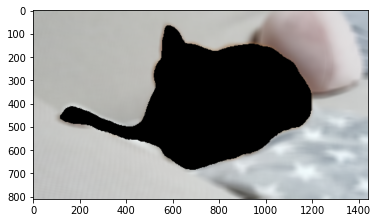

In [60]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

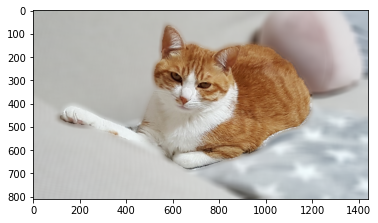

In [61]:
# 흐리게 한 배경과 원본 영상 합성하기

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고 

오늘 신기했던 것은 segmentation을 모양을 인식해 픽셀별로 분리시키는 줄 알았는데 기존에 segmentation을 학습한 모델을 이용해  
객체를 분리시킨다는 것이었다. 이렇게 쉽고 간단하게 객체를 분리할 수 있다니 신세계를 경험한 것 같다.   

DeepLab은 회사 이름인 줄 알았더니 논문 제목에 나온 알고리즘 이름이었다.아직 논문을 읽은 짭밥은 아닌 것 같고  

DeepLab이라는 논문은 기존의 CNN이 segmentation에서 가지고 있던 3가지 문제를 제기하고 이에 대한 해결책을 제시한 것이다.   

1) spatial 정보를 놓친다.  
⇒ Atrous convolution 사용  

2) 물체 scale들이 다르다.  
⇒ Atrous spatial pyramid pooling (ASPP)  

3) 윤곽선을 잘 못잡는다.  
⇒ conditional random fields  

DeepLab도 version 3+까지 나온 것 같은데 Semantic Segmetation도 한번 모아서 공부해 보아야 할 것 같다. 


